Pixel to real world: approx. 25 pix = 1 inch

In [1]:
import os
import numpy as np
import cv2

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    

from PIL import Image, ImageFilter 
from matplotlib.pyplot import imshow

In [2]:
def pixel2world(pt):
    """
    Convert from pixel vector (0, pt) to world vector for arm motion
    
    """
    raise NotImplementedError("TODO")
    
# Helper functions unused
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [3]:
def decide_direction(dough_cnts, dough_center, circle_center, circle_r):
    """ 
    Janko: that's where we left off 
        
    Output:
        (x_from_origin, y_from_origin) in the image space that represents the direction and distance 
        of the least rolled direction. 
    """
    circle_x, circle_y = circle_center
    dough_x, dough_y = dough_center
    # The circle satisfies (x-circle_x)**2 + (y-circle_y)**2 = circle_r**2
    # The dough_line passes dough_center and a pt in dough_contours and is represented by y=ax+b
    for (pt_x, pt_y) in dough_cnts:
        dough_line_a = (pt_y-dough_y)/(pt_x-dough_x)
        dough_line_b = pt_y - dough_line_a*pt_x + circle_y
        
    return min_dir

In [4]:
def dough_boundary(dough_img):
    # Judge by the specific dough color - it's blue so its R value is very low
    ind = np.where(dough_img[:,:,2]<70)
    mag = np.zeros((dough_img.shape[0], dough_img.shape[1], 1)).astype('uint8')
    for (i,j) in zip(ind[0], ind[1]):
        mag[i,j, :] = 1
    ddepth = cv2.CV_16S
    kernel_size = 3
    dst = cv2.Laplacian(mag, ddepth, ksize=kernel_size)
    imshow(abs(dst)>1.5)
    # Edge magnitude above a hard-coded threshold
    return np.where(abs(dst)>1.5)


In [5]:
def dough_approx_center(cnts):
    cY=cnts[0].sum()/len(cnts[0])
    cX=cnts[1].sum()/len(cnts[1])
    return (int(cX), int(cY))

In [6]:
def read_img(f_path='dough.png'):
    patch_of_interest=[100, 320, 250, 500] #left right up down
    dough = np.asarray(Image.open(f_path))[patch_of_interest[0]: patch_of_interest[1],\
                                               patch_of_interest[2]: patch_of_interest[3]]
    dough = cv2.cvtColor(dough, cv2.COLOR_BGR2RGB)
    imshow(dough)
    return dough

In [7]:
def drawing_boundary(img):
    """
    Given a drawing with a circle, detect the center and the radius.
    """
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    minRadius = 50
    maxRadius = 160
    output = img_gray.copy()
    circles = cv2.HoughCircles(image=output, 
                               method=cv2.HOUGH_GRADIENT, 
                               dp=1.8, 
                               minDist=2*minRadius,
                               param1=50,
                               param2=50,
                               minRadius=minRadius,
                               maxRadius=maxRadius                           
                              )
    circlesRound = np.round(circles[0, :]).astype("int")
    x, y, r = circlesRound[0]
    
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circlesRound = np.round(circles[0, :]).astype("int")
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circlesRound:
            print(x, y, r)
            cv2.circle(output, (x, y), r, (0, 0, 255), 4)

    imshow(output)
    return (x,y), r

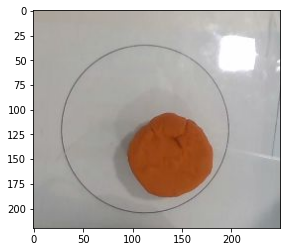

In [8]:
dough_img = read_img()

111 118 84


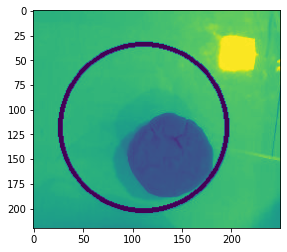

In [9]:
circle_center, circle_r = drawing_boundary(dough_img)

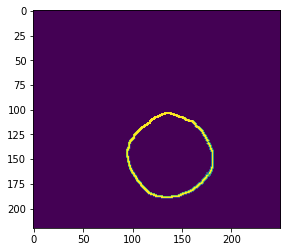

In [10]:
dough_contour = dough_boundary(dough_img)

In [11]:
dough_center = dough_approx_center(dough_contour)
print(dough_center)

(137, 146)
